   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

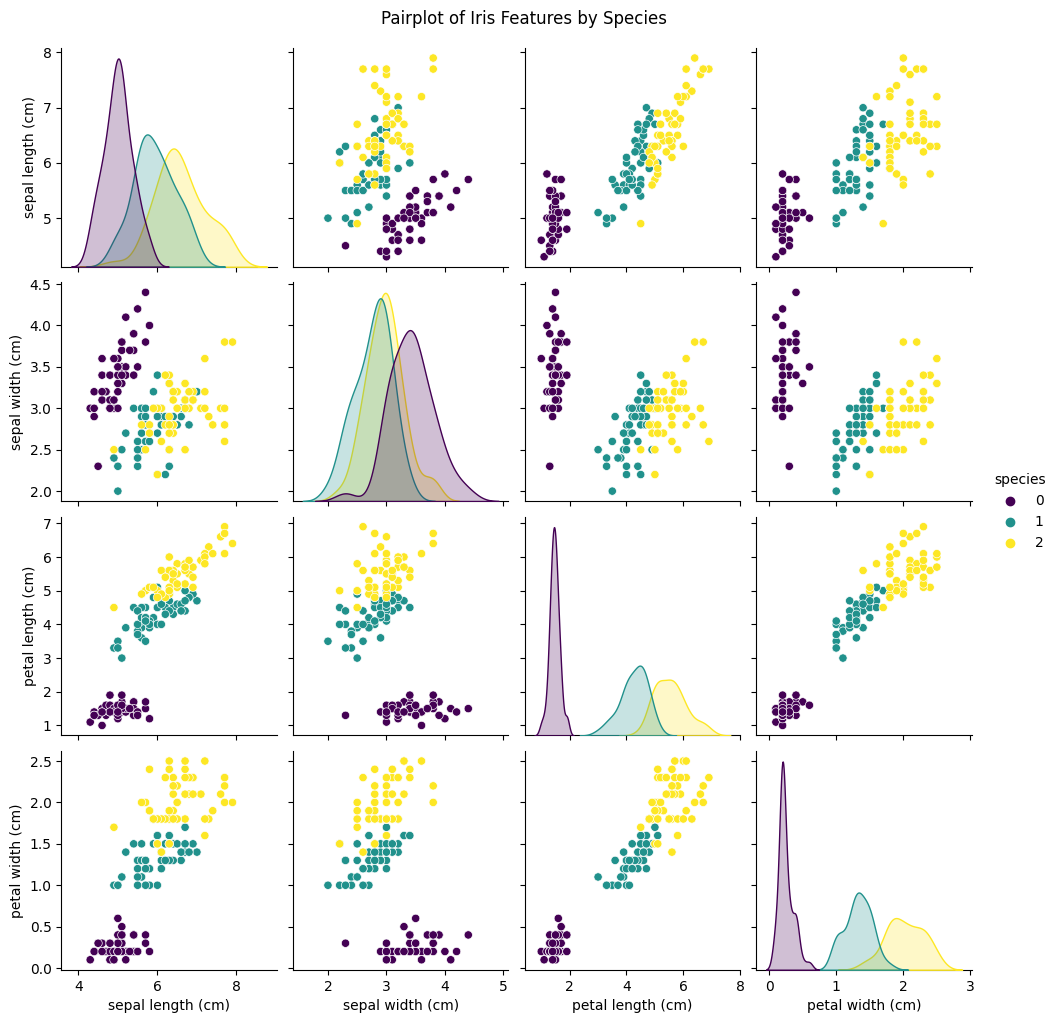

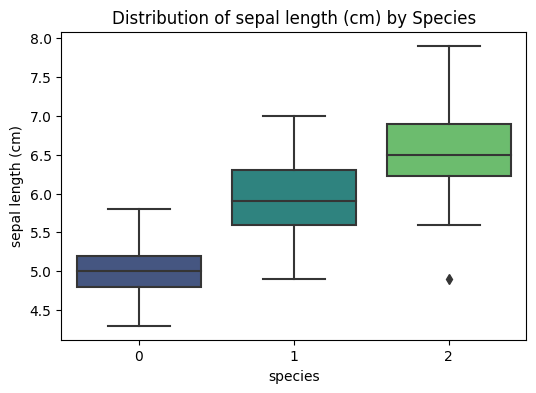

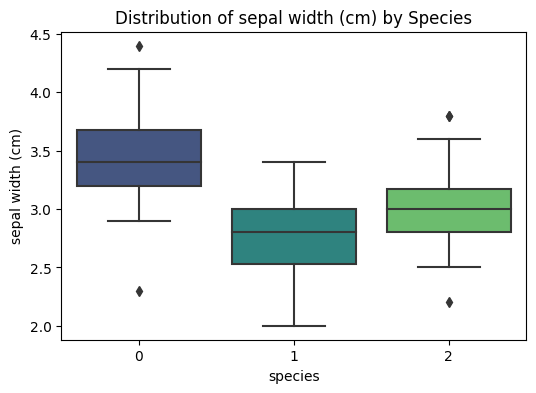

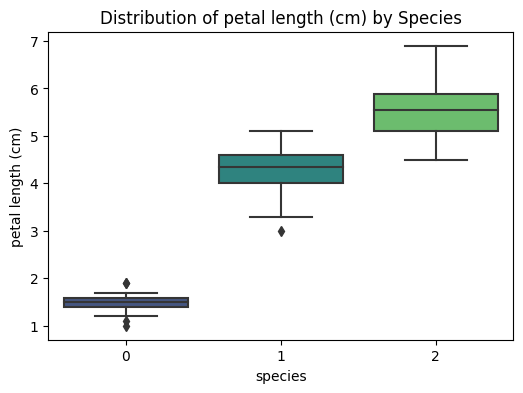

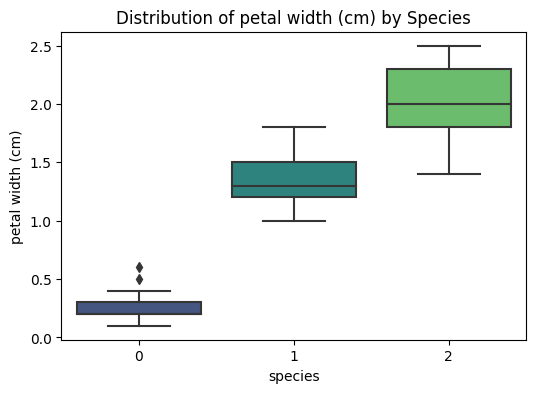

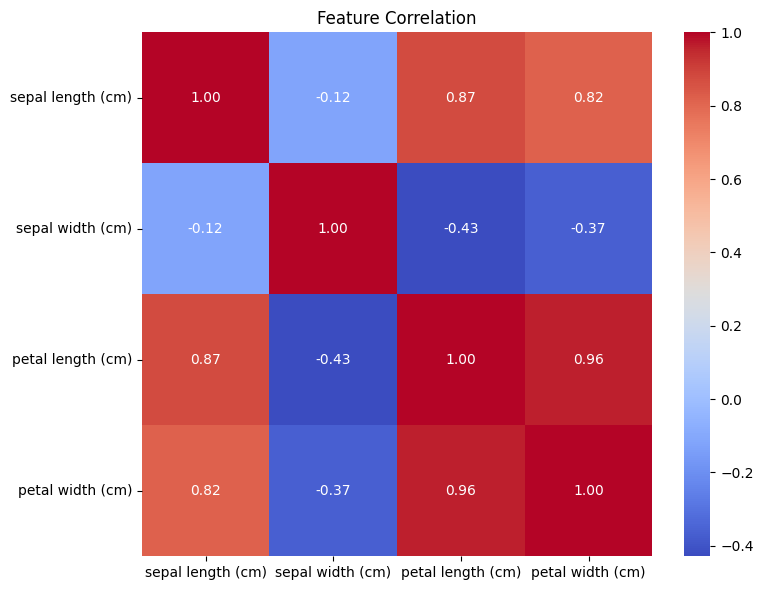


Explained variance ratios for PCA components: [0.72962445 0.22850762]
Total explained variance: 0.9581320720000165


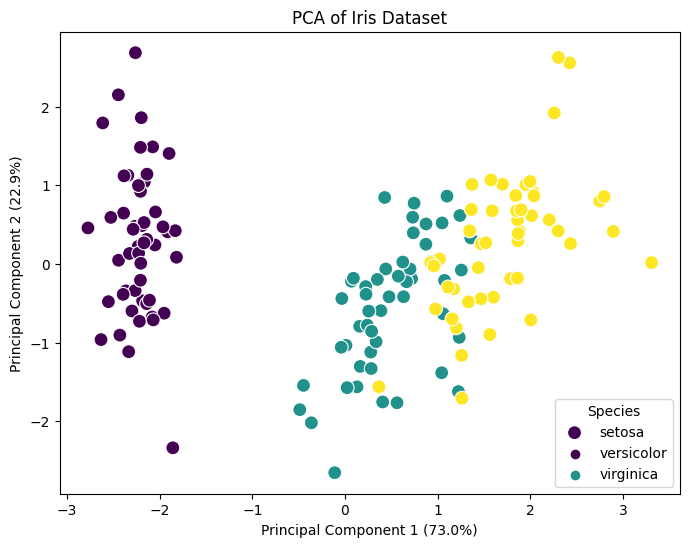


Cross-Validation Accuracy scores: [0.93333333 0.9        0.8        1.         0.8       ]
Mean CV Accuracy: 0.8867 ± 0.0777

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.89      0.80      0.84        10
   virginica       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



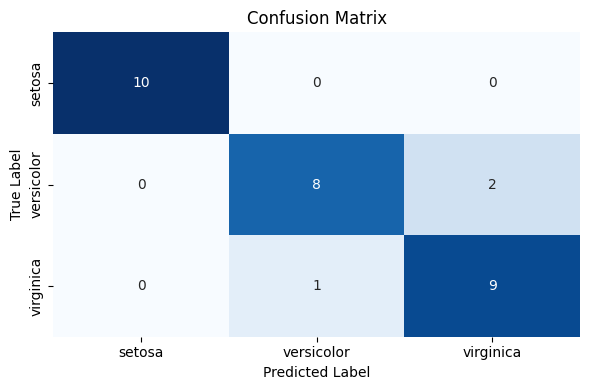

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Prediction for sample [5.1, 3.5, 1.4, 0.2]: setosa


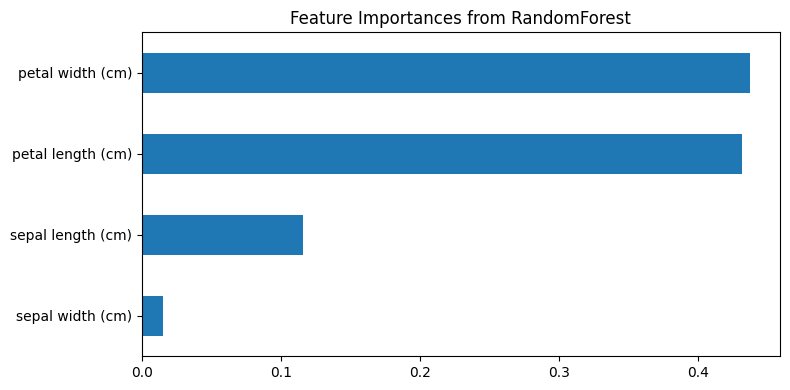

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load data
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Data exploration
print(X.head())
print(X.info())
print(X.describe())
species_series = pd.Series(y, name='species')
print("\nClass distribution:")
print(species_series.value_counts())
print("\nMissing values:")
print(X.isnull().sum())

# Combine features and target for visualization
df = pd.concat([X, pd.Series(y, name='species')], axis=1)

# Visualizations
sns.pairplot(df, hue='species', palette='viridis')
plt.suptitle('Pairplot of Iris Features by Species', y=1.02)
plt.show()

for feature in iris.feature_names:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='species', y=feature, data=df, palette='viridis')
    plt.title(f'Distribution of {feature} by Species')
    plt.show()

# Correlation analysis
plt.figure(figsize=(8, 6))
corr = X.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation')
plt.tight_layout()
plt.show()

# PCA analysis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("\nExplained variance ratios for PCA components:", pca.explained_variance_ratio_)
print("Total explained variance:", sum(pca.explained_variance_ratio_))

plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', s=100)
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.1%})')
plt.title('PCA of Iris Dataset')
plt.legend(title='Species', labels=iris.target_names)
plt.show()

# Model pipeline with cross-validation
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(pipeline, X, y, cv=skf, scoring='accuracy')
print("\nCross-Validation Accuracy scores:", cv_scores)
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Train-test split for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
pipeline.fit(X_train, y_train)

# Evaluation
y_pred = pipeline.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names, 
            cmap='Blues',
            cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Save and load model
joblib.dump(pipeline, 'iris_model.pkl')

# Test loaded model
model = joblib.load('iris_model.pkl')
sample = [[5.1, 3.5, 1.4, 0.2]]  # Example sample
prediction = model.predict(sample)
print(f"\nPrediction for sample {sample[0]}: {iris.target_names[prediction[0]]}")

# Add feature importances (from the RandomForest without PCA)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

plt.figure(figsize=(8, 4))
importances = pd.Series(rf.feature_importances_, index=iris.feature_names)
importances.sort_values().plot(kind='barh')
plt.title('Feature Importances from RandomForest')
plt.tight_layout()
plt.show()